In [ ]:
# I have used the kaggle dataset which I am going to work on my thesis and give the output for the house pricing.

In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [104]:
df = pd.read_csv(r'C:\Users\Neil1\Downloads\Bengaluru_House_Data.csv', encoding='ISO-8859-1')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [105]:
df.shape

(13320, 9)

In [106]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [107]:
#Drop the features that are not required to build the model

In [108]:
df1=df.drop(['area_type', 'society', 'balcony', 'availability'],axis='columns')
df1.shape

(13320, 5)

In [109]:
#data cleaning to handle NA values

In [110]:
df1.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [111]:
df1.shape

(13320, 5)

In [112]:
df2=df1.dropna()
df2.isnull().sum() #keep the updated dataframe in df2

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [113]:
df2.shape

(13246, 5)

In [114]:
#feature engineering: Add a feature(integer) for BHK(Bedroom Hall Kitchen)

In [115]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2['size'].unique() # some are BKH and some are 4 bedroom. So, change the string into an integer

C:\Users\Neil1\AppData\Local\Temp\ipykernel_13464\3576261599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [116]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [117]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [118]:
df2[df2.bhk>20] # It seems like an error where 2400sqft in 43bhk to stort that we can take an average of numbers

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [119]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [120]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [121]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [122]:
# In above it shows that total_sqft can be range (e.g.,, 2100-2850). where we can take the min or max value in the range.
# In the other case 34.46sq.meter, that can be convert to squarre ft using unit conversion.
# In this dataset I am going to drop such cases to simplify the process.

In [123]:
#take the range for total square foot
def convert_sqft_to_num(x):
    if isinstance(x, str):
        tokens = x.split('-')  # Corrected variable name from token to tokens
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        try:
            return float(x)  # If x is a single value, convert it to float
        except:
            return None  # Return None for any other cases
    return x  # Return x unchanged if it's not a string


In [124]:
convert_sqft_to_num('2166') # converts into a float

2166.0

In [125]:
convert_sqft_to_num('2100 - 2850') #range from a square foot

2475.0

In [126]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(4)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [127]:
#below shows the total_sqft as 2475 which is an average of 2100-2850

In [128]:
df3.loc[30] #location

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [129]:
(2100+2850)/2 #average to check the output is correct or not

2475.0

In [130]:
#feature engineering and dimentionality reduction
# Added a new feature called price per square feet

In [131]:
#check the price per square foot
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [132]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [133]:
#Examine the location which is a categorical varaible. To apply the dimensionality reduction here to reduce the number of locations

In [134]:
len(df4.location.unique())

1298

In [135]:
# lets figureout how many data points are available

In [136]:
df4.location = df4.location.apply(lambda x: x.strip()) #it removes the leading space from the location
location_stats = df4.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [137]:
#sort the location through datapoints
df4.location = df4.location.apply(lambda x: x.strip()) #it removes the leading space from the location
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [138]:
location_stats.values.sum()

13200

In [139]:
len(location_stats[location_stats>10])

240

In [140]:
# so many data points has only one data point. So, we can reduce that by treshold points by saying any location that is less than 10 data points are other location.
len(location_stats)

1287

In [141]:
len(location_stats[location_stats<10])

1033

In [142]:
# Dimentionality Reduction
# Any location having less than 10 data points should be tagged as "other" location
# In this way number of categories can be huge amount. Later on, when we do one hot encoding, it will help us wit fewer dummy columns

In [143]:
#print the locations that are ;ess than 10 data points
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [144]:
len(df4.location.unique())

1287

In [145]:
#apply transformation to remove the data points which are less than 10
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

241

In [146]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [147]:
#outlier removal
#ouliers are nothing but data errors
# in this dataset we can see the outliers in sqft and bhk
# example, if the bedroom measurement is 300sqft( i.e, 2bhk apartment is minimum 600 sqft). If we have a 400 sqft apartment with 2bhk then that seems suspicious and can be removed as an outlier.  
# remove such outliers by keeping our minimum threshold per bhk to be 300 sqft.

In [148]:
df4[df4.total_sqft/df4.bhk<300].head() #so the dataset has some basic outliers and we can use the average bedroom measurement sqft to find the error.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [149]:
#for the above datapoints, we have 6bhk apartment with 1020 sqft. another one is 8bhk and total sqft is 600. these are clear data errors that can be removed safely.

In [150]:
df4.shape

(13200, 7)

In [151]:
# To remove the outliers create another variable
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

In [152]:
#outlier removal using standard deviation and mean

In [153]:
df5.price_per_sqft.describe()
# The minimum is 267/- which is ususual in the city and maximum is 176470/- whixh is too expensive

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [154]:
# write a function that removes the exterme case of standard deviation (it is a measure of the amount of variation or dispersion in a set of data points).
#it indicates how much the values in a dataset differ from the mean(average) value.
# that used to understand the spread of data points in a distribution and to assess the consistency or variablity of a dataset.

In [155]:
#per location find the mean and standard deviation and filter out if there is any data points that are beyond one standard deviation
def remove_pps_outliers(df): # take dataframe as an input df
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #group them by location, and take a sub-frame
        m = np.mean(subdf.price_per_sqft) # m as mean
        st = np.std(subdf.price_per_sqft) # st as standard derviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] # filterout the price_per_sqft beyond the standard deviation points, which means above one standard deviation or below one standard deviation and stave it to reduced dataframe
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(10242, 7)

In [156]:
#checkout for a given location how does the graph looks like

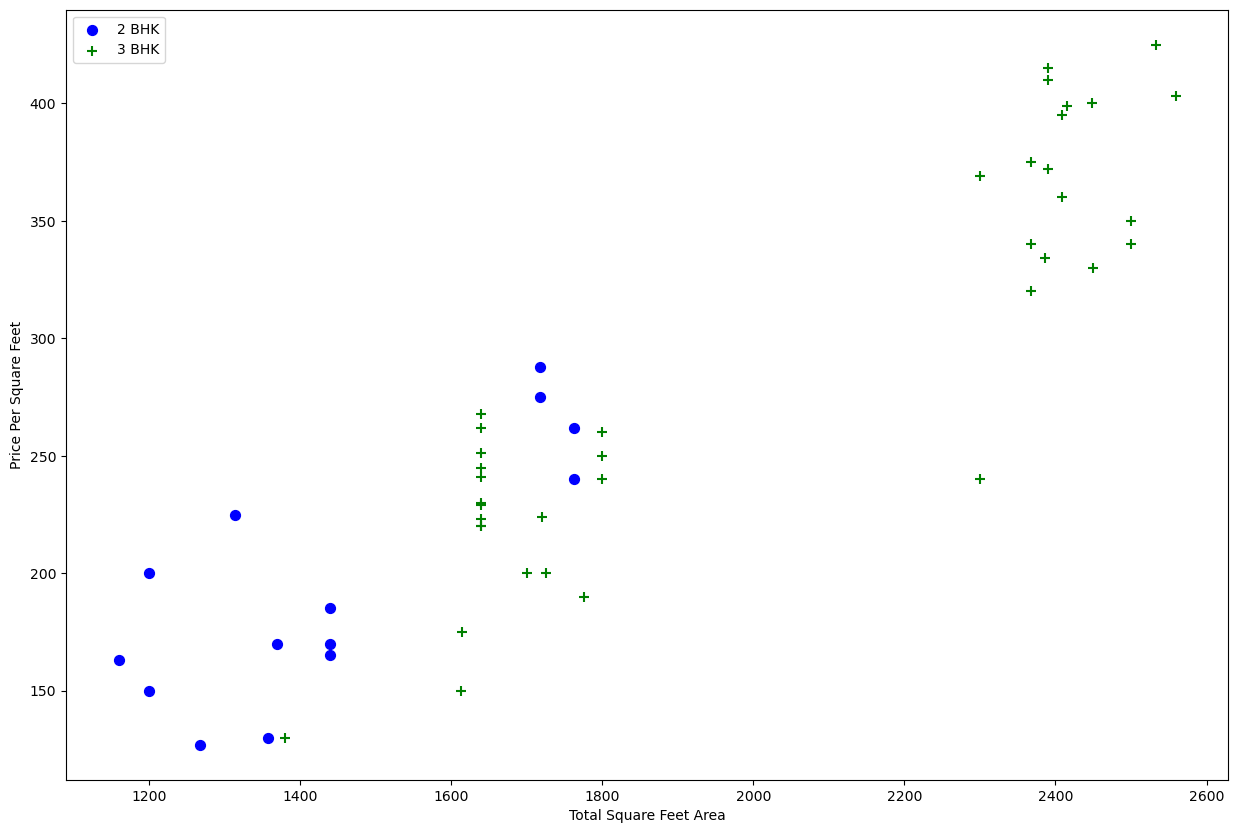

In [157]:
# take the location and plot the graph for 2bhk and 3 bkh.
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10) # use the scatter plot to identify the data points
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.legend()

plot_scatter_chart(df6,"Rajaji Nagar")

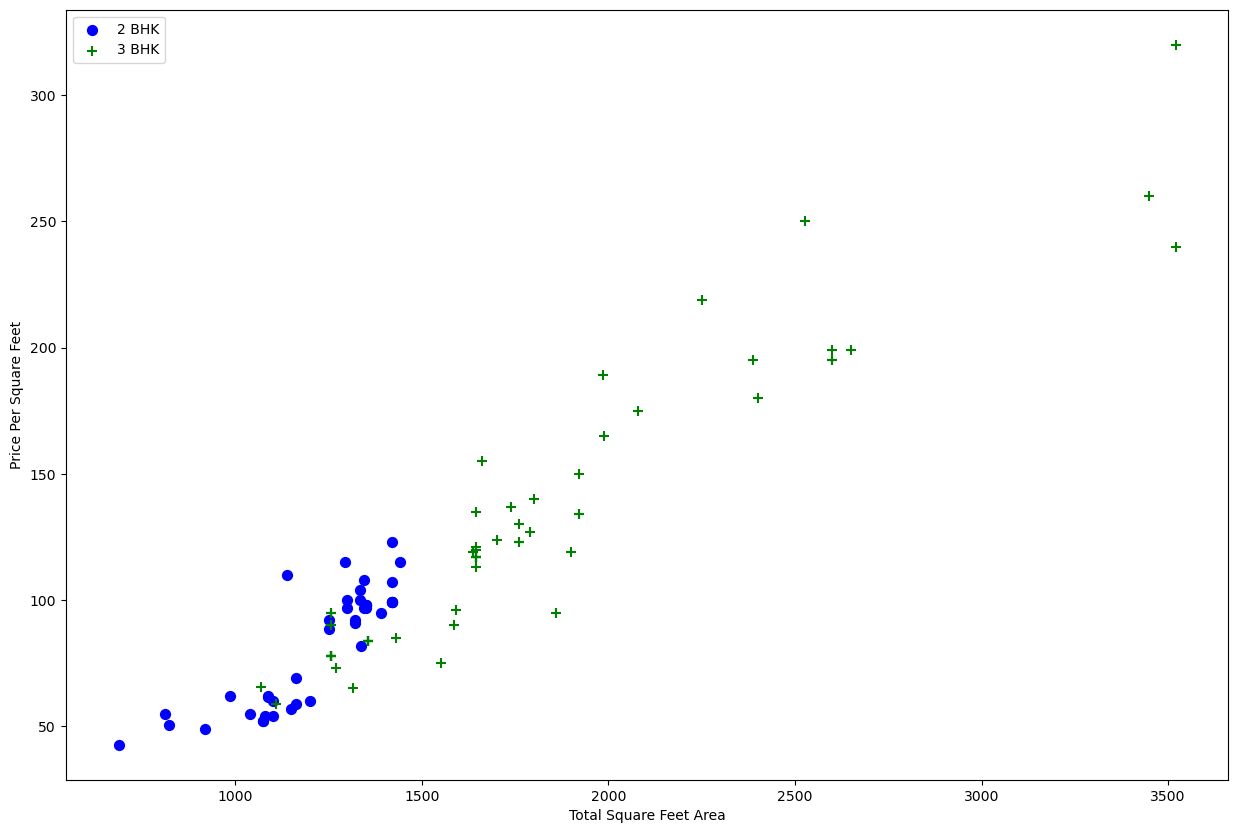

In [158]:
plot_scatter_chart(df6,"Hebbal")

In [159]:
# we should also remove properties where for same location, the price of (for example) 3 bedroom apaertment is less than 2 bedroom apartment(with same square ft area).
# for that we will build a dictinary of stats per bhj, i.e

#{
    #'1' : {
        #'mean' : 4000,
        #'std' : 2000,
        #'count' :34
    #},
    #'2' : {
        #'mean' :4300,
        #'std' :2300,
        #'count' : 22
    #},
   
#}

# now we can remove those 2BHK apaertment whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment


In [160]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):  # the dataframe goes through every location
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):  # and group by bhk
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7317, 7)

In [161]:
#plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

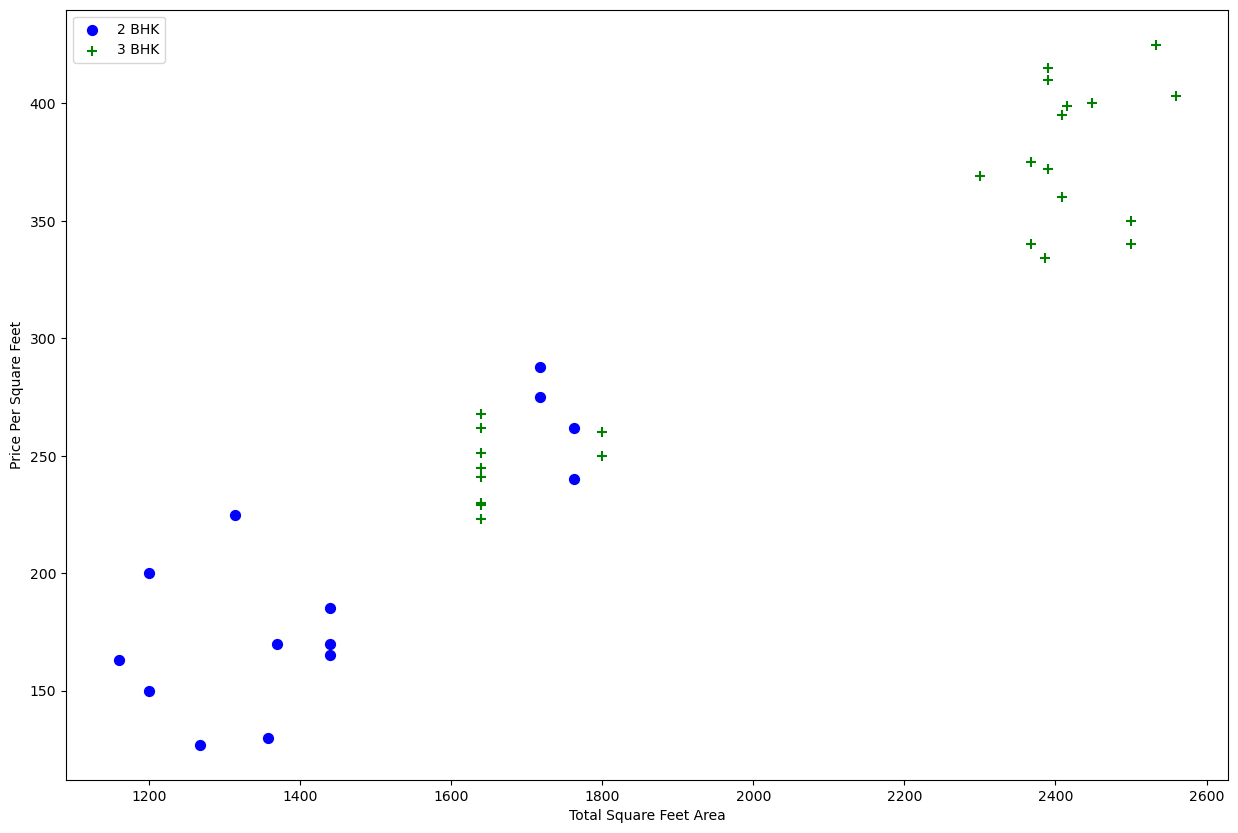

In [162]:
plot_scatter_chart(df7,"Rajaji Nagar")

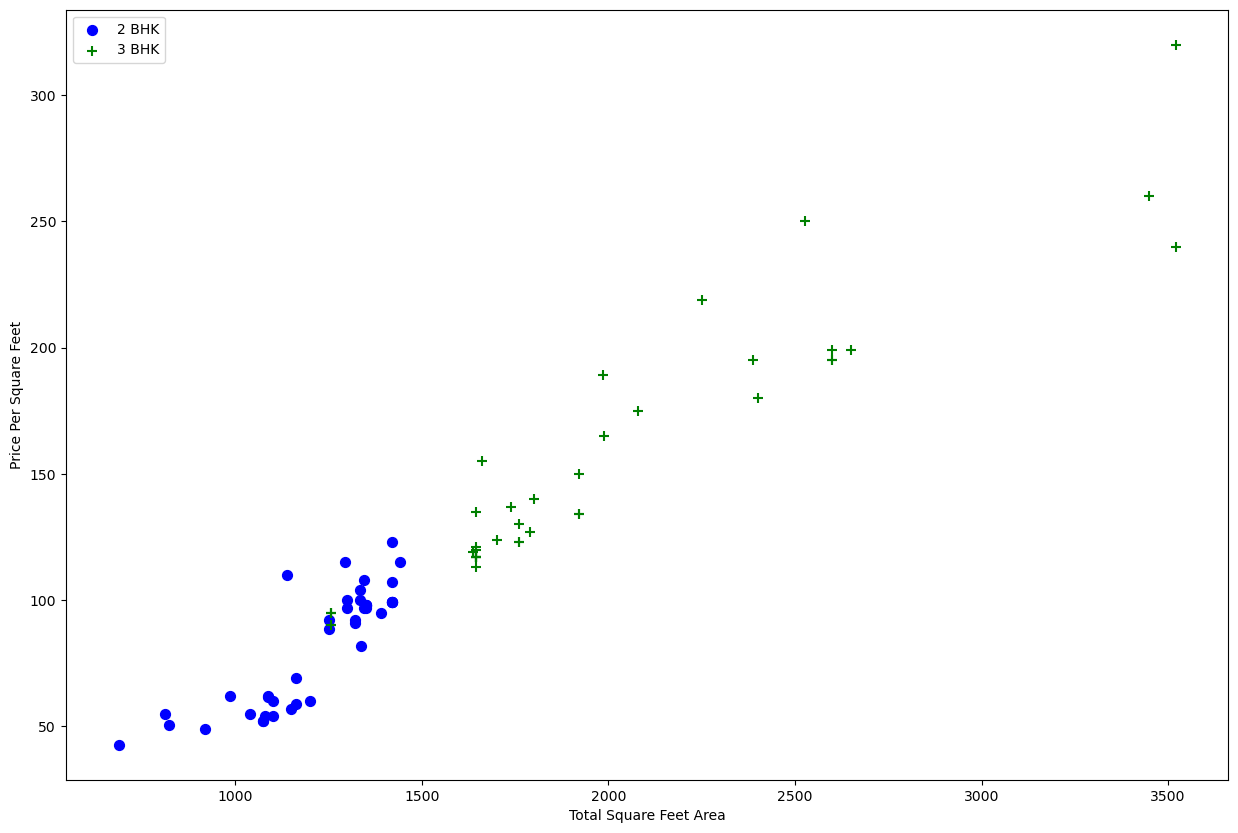

In [163]:
plot_scatter_chart(df7,"Hebbal")

In [164]:
#by using remove_bhk_ouliers function we removed the outliers

Text(0, 0.5, 'Count')

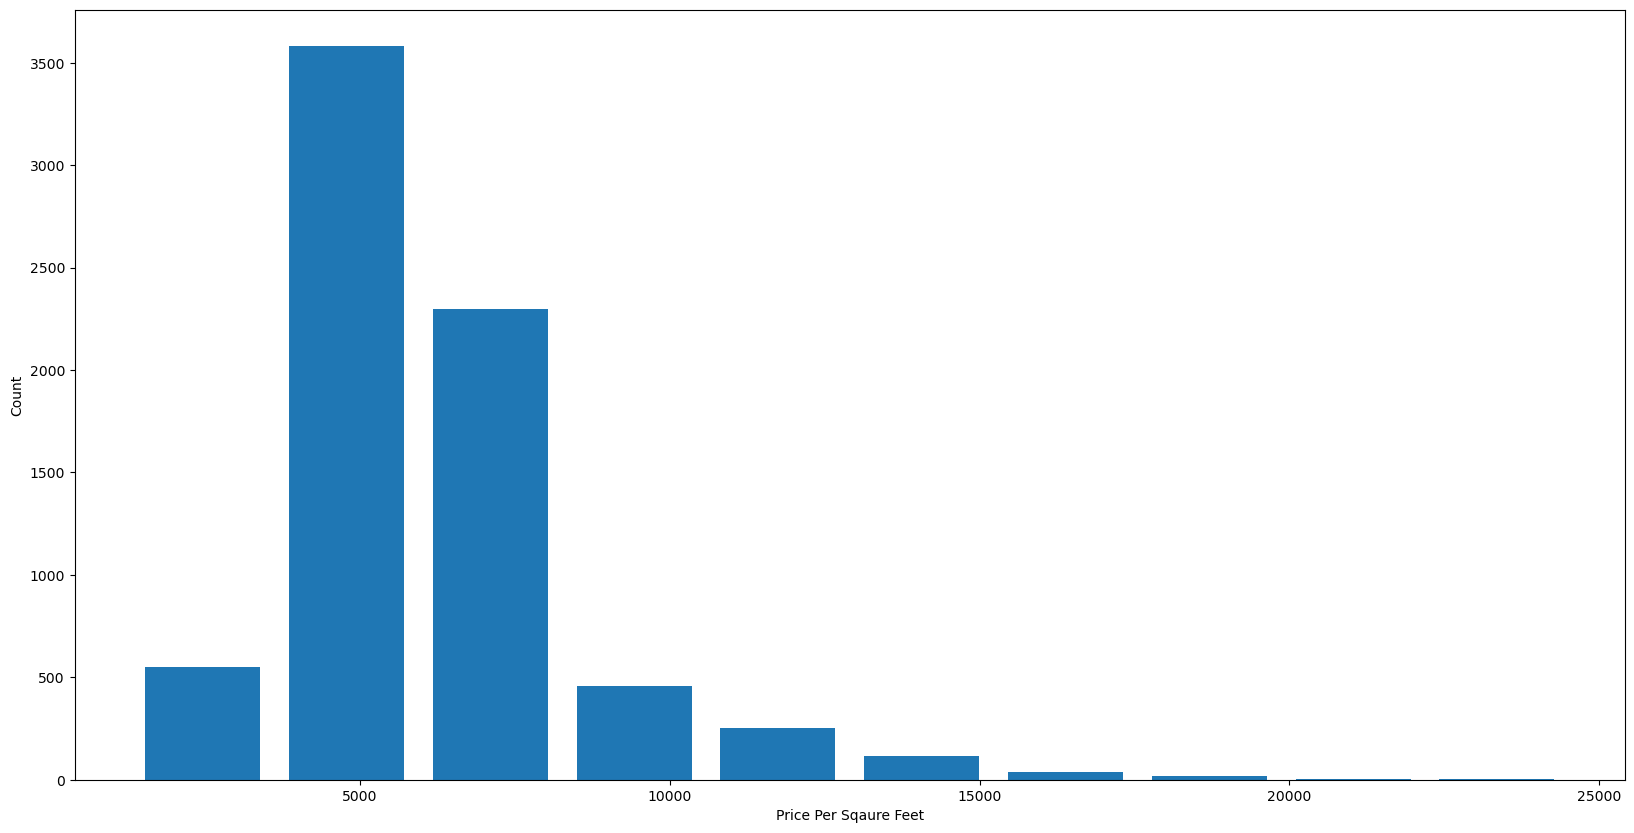

In [165]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Sqaure Feet")
plt.ylabel("Count")

In [166]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [167]:
df7[df7.bath>10] #its an outlier to have 2bhk that has 4 bath

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

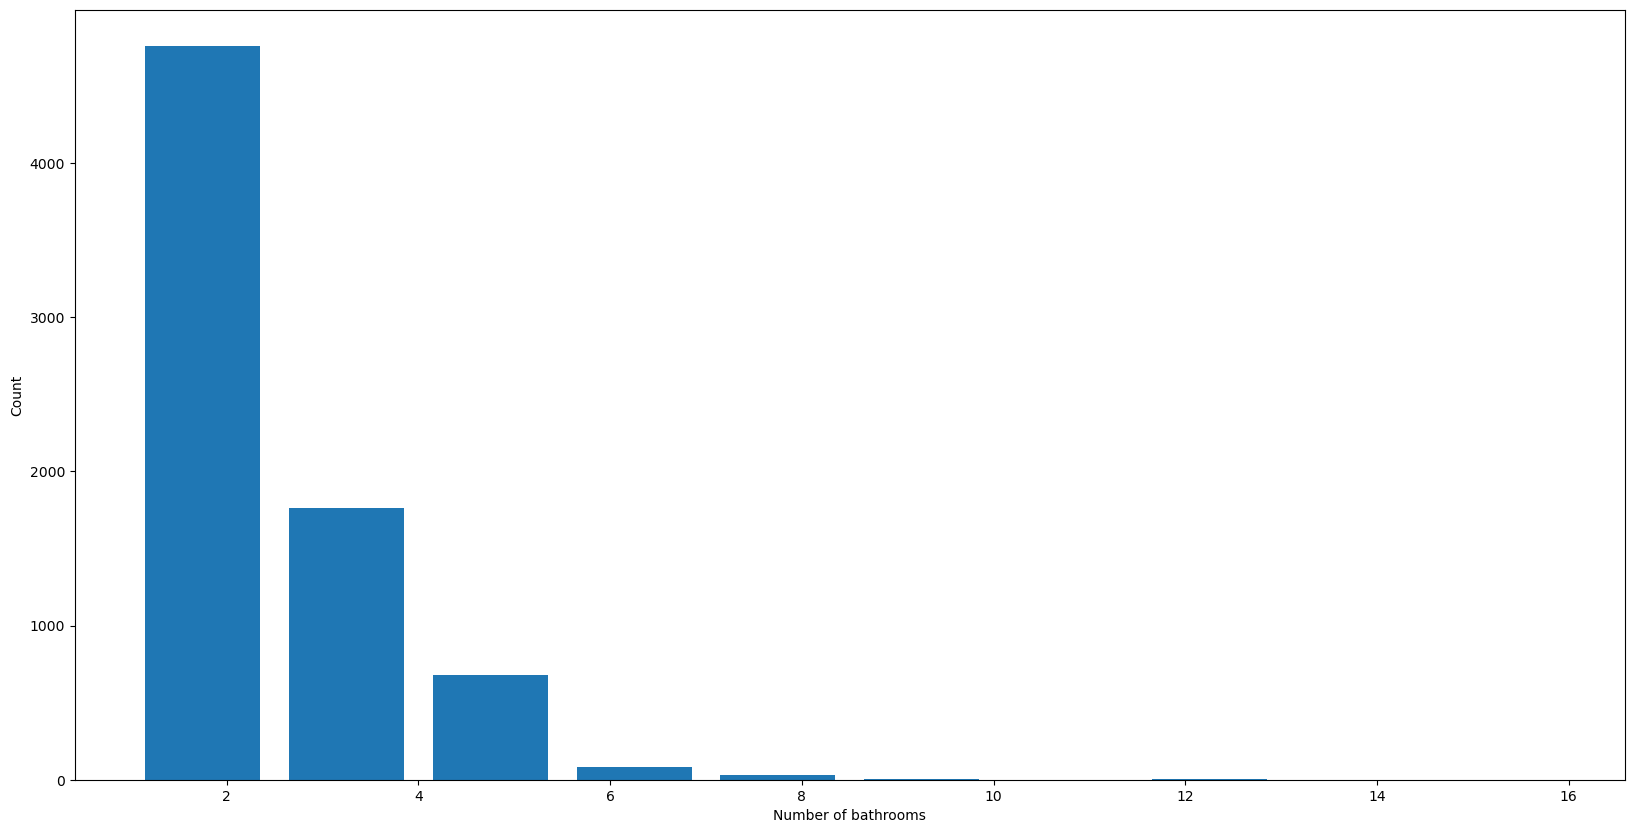

In [168]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [169]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [170]:
df7[df7.bath>df7.bhk+2] #It is an unusual to have 2 more bathrooms than number of bedrooms in a house

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [171]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7239, 7)

In [172]:
df8.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [173]:
df9 = df8.drop(['size', 'price_per_sqft'], axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [174]:
#modeling of dataset by using one hot encoding for location

In [175]:
# To model the data it should be in float variables.
#we have location as the string. So, to convert that is called one hot encoding or dummies. I am using the pandas dummies method 

In [176]:
import pandas as pd

# Assuming df9 is your DataFrame and 'location' is the column to convert
dummies = pd.get_dummies(df9['location'], dtype=int)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df10 = pd.concat([df9,dummies.drop('other', axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
df11 = df10.drop('location', axis='columns')
df11.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
df11.shape

(7239, 244)

In [180]:
# create an x variable that contains independent variables
# in this dataset price is the dependent variable. so, we can remove that from the dataset
X = df11.drop('price',axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [182]:
len(y)

7239

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [184]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229441

In [185]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [186]:
# crossvalidation
#by using shuffle method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

# by using the linear regression model and cross validation method we got more that 80%

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [187]:
# As we can see that there are 5 iterations we get a score above 80% all the time.
# which means the algorithm is good.
# we can also test a few other algorithms for regression to see if we can get a better score.
# for that we can use the GridSearchCV for this purpose

In [188]:
# we can use the different methods to check which methods gives the best model
# I have used the GridSearchCv method to find out the best model for the dataset

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

#use python libraries
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

# Example usage assuming X and y are already defined
# Replace X and y with your actual data
# best_model_results = find_best_model_using_gridsearchcv(X, y)


C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.847951,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.726746,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.715763,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [189]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [190]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [191]:
#Based on the above results we can say that Linear Regression gives the Best score. Hence we will use that.

In [192]:
#price prediction
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [193]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258312473

In [194]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284987247

In [195]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.3119773318

In [196]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Neil1\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854775

In [197]:
# export all the dataset to the file
import pickle
with open('bangalore_home_prices_model_pickle','wb') as f:
    pickle.dump(lr_clf ,f)

In [198]:
# Export location and column information to a file that will be useful later on in the prediction application

In [199]:
# import everything to a python flask server for the further process
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))